In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=1000, weights=[0.5, 0.5], random_state=0)

# Training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
class LogReg():
  def __init__(self, n_features: int):
    np.random.seed(430)

    self.weights = np.random.normal(size=(n_features,))

  def predict(self, X: np.ndarray) ->  np.ndarray:
    z = np.dot(X, self.weights)
    return 1 / (1 + np.exp(-z))

  def gradient(self, X:  np.ndarray, y:  np.ndarray) ->  np.ndarray:
    y_hat = self.predict(X)
    # New expression for derivative:
    return -np.dot(X.T, y - y_hat)

  def loss(self, X:  np.ndarray, y:  np.ndarray) -> float:
    return - (np.sum(y * np.log(self.predict(X)) + (1-y) * np.log(1 - self.predict(X)))) / len(y)

In [3]:
def get_accuracy(y_predicted, y) -> float:
  correct = 0
  for i in range(len(y)):
    pred = 0 if y_predicted[i] < 0.5 else 1
    if pred == y[i]:
      correct += 1
  return correct / len(y)

def train(log_reg):

  train_losses = []
  test_losses = []
  # Epoch count
  for i in range(100):
    g = log_reg.gradient(X_train, y_train)
    log_reg.weights = log_reg.weights - .001 * g

    train_losses.append(log_reg.loss(X_train, y_train))
    test_losses.append(log_reg.loss(X_test, y_test))

  train_acc = get_accuracy(log_reg.predict(X_train),y_train)
  test_acc = get_accuracy(log_reg.predict(X_test),y_test)
  print("Accuracy on training set:", train_acc)
  print("Accuracy on testing set:", test_acc)

  return train_acc, test_acc, train_losses, test_losses

Accuracy on training set: 0.9485714285714286
Accuracy on testing set: 0.92
Train acc 0.9485714285714286
Test acc 0.92


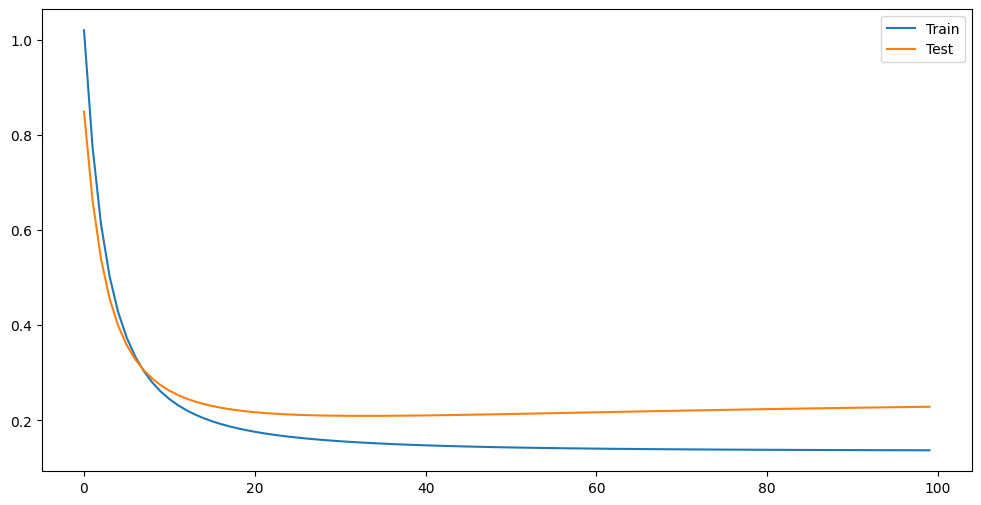

In [4]:
log_reg = LogReg(20)
train_acc, test_acc, train_losses, test_losses = train(log_reg)

plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.legend()


print("Train acc", get_accuracy(log_reg.predict(X_train), y_train))
print("Test acc", get_accuracy(log_reg.predict(X_test), y_test))


In [5]:
class LogReg2():
  def __init__(self, n_features: int, reg_lambda: float):
    np.random.seed(430)

    self.reg_lambda = reg_lambda
    self.weights = np.random.normal(size=(n_features,))

  def predict(self, X: np.ndarray) ->  np.ndarray:
    z = np.dot(X, self.weights)
    return 1 / (1 + np.exp(-z))

  def gradient(self, X:  np.ndarray, y:  np.ndarray) ->  np.ndarray:
    y_hat = self.predict(X)
    # New expression for derivative:
    return -np.dot(X.T, y - y_hat) + self.reg_lambda*self.weights

  def loss(self, X:  np.ndarray, y:  np.ndarray) -> float:
    return -((np.sum(y * np.log(self.predict(X)) + (1-y) * np.log(1 - self.predict(X))) - self.reg_lambda * 0.5 * np.sum(self.weights**2)))  / len(y)

For lambda 0.01
Accuracy on training set: 0.9485714285714286
Accuracy on testing set: 0.92


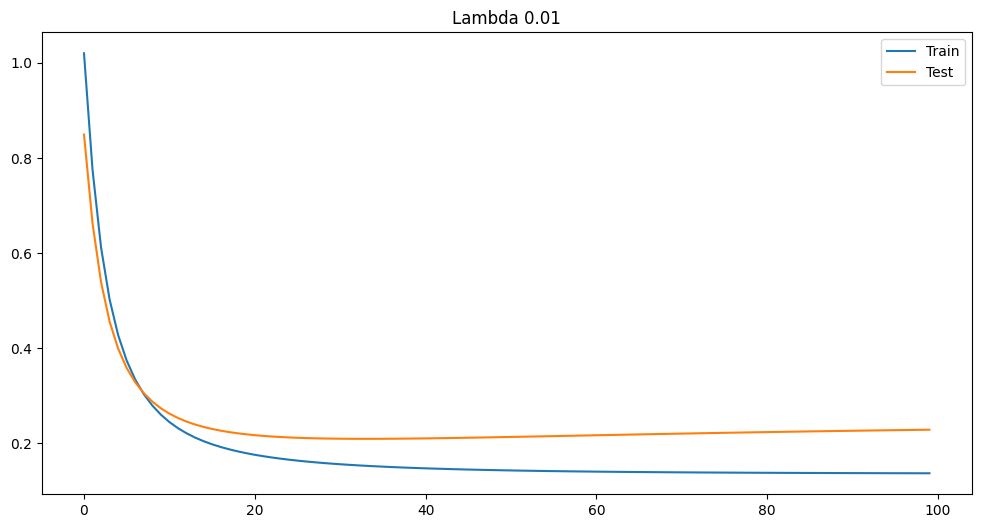

For lambda 0.1
Accuracy on training set: 0.9485714285714286
Accuracy on testing set: 0.9233333333333333


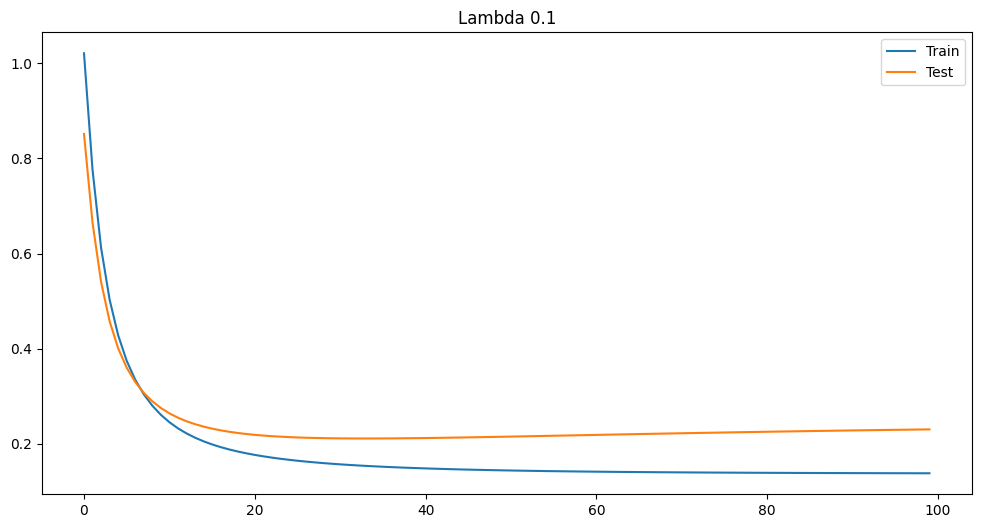

For lambda 1
Accuracy on training set: 0.95
Accuracy on testing set: 0.9233333333333333


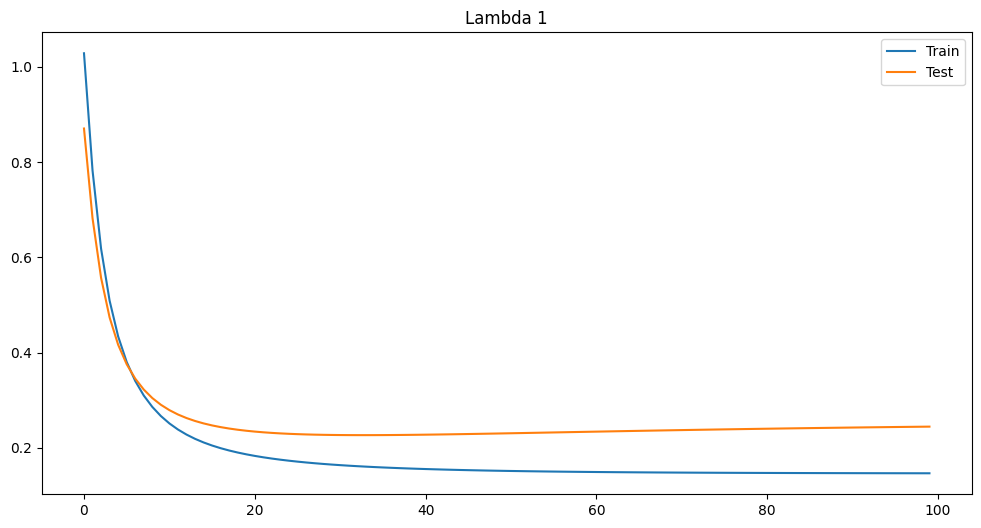

For lambda 10
Accuracy on training set: 0.95
Accuracy on testing set: 0.9233333333333333


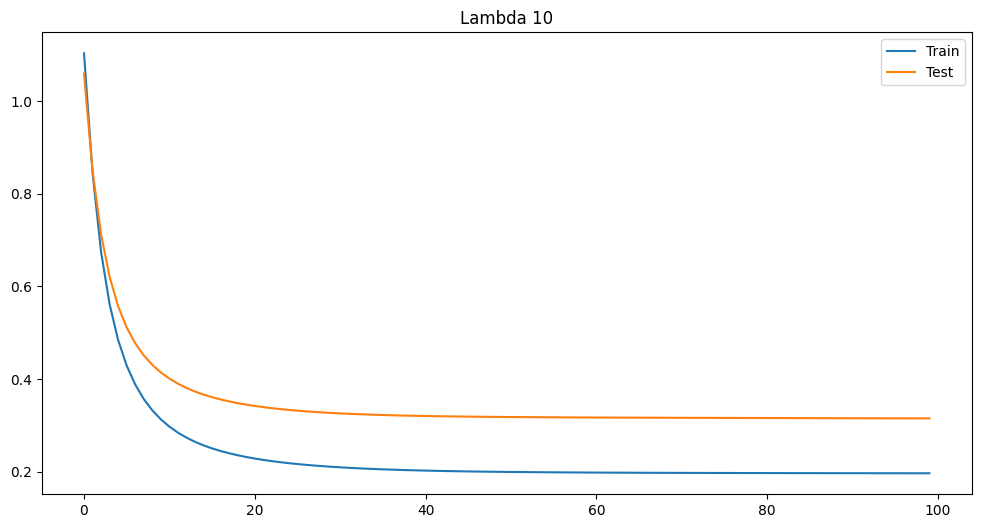

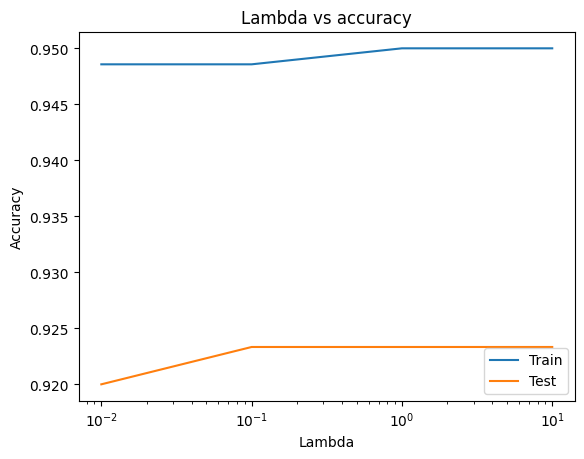

In [6]:
lambdas = [0.01, 0.1, 1, 10]

logs = []
for i in range(4):
  logs.append(LogReg2(20, lambdas[i]))

train_accs = []
test_accs = []
for i in range(4):
  l = logs[i].reg_lambda
  print("For lambda",l)
  train_acc, test_acc, train_losses, test_losses = train(logs[i])
  train_accs.append(train_acc)
  test_accs.append(test_acc)
  plt.figure(figsize=(12, 6))
  plt.plot(train_losses, label="Train")
  plt.plot(test_losses, label="Test")
  plt.legend()
  plt.title("Lambda "+str(l))
  plt.show()


plt.plot(lambdas, train_accs, label="Train")
plt.plot(lambdas, test_accs, label="Test")
plt.xlabel("Lambda")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Lambda vs accuracy")
plt.legend()
plt.show()


# Neural Network

In [7]:
class Linear:
  def __init__(self, in_features: int, out_features: int):
    self.weights = np.random.normal(size=(in_features, out_features))
    self.in_features = in_features
    self.out_features = out_features

  def forward(self, x: np.ndarray) -> np.ndarray:
    return np.dot(x, self.weights)

  def gradient(self, x: np.ndarray, gradient: np.ndarray):
    der1 = np.dot(gradient, self.weights.T)
    der2 = np.dot(x.T, gradient)
    return (der1, der2)

In [8]:
class Sigmoid:
  def __init__(self):
    pass

  def forward(self, x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

  def gradient(self, x: np.ndarray, gradient: np.ndarray) -> np.ndarray:
    return gradient * self.forward(x) * (1 - self.forward(x))

In [9]:
class Loss:
  def __init__(self):
    pass
  def loss(self, X:  np.ndarray, y:  np.ndarray) -> float:
    return -np.sum(y * np.log(X) + (1-y) * np.log(1-X)) / len(y)
  def gradient(self, y: np.ndarray, y_train: np.ndarray):
    return -(y_train / (y) + -(1 - y_train) / (1 - y)) / len(y)

In [10]:
def nn_forward(y_train: np.ndarray):
  y_train = y_train[:,None]

  l1 = Linear(20, 5)
  sigmoid = Sigmoid()
  l2 = Linear(5, 1)
  loss = Loss()

  train_losses = []

  for j in range(500):
    y_1 = l1.forward(X_train)
    y_2 = sigmoid.forward(y_1)
    y_3 = l2.forward(y_2)
    y_4 = sigmoid.forward(y_3)
    L = loss.loss(y_4, y_train)
    # print(L)
    train_losses.append(L)

    # Gradient descent
    dLda2 = loss.gradient(y_4, y_train)
    dLdz2 = sigmoid.gradient(y_3, dLda2)
    dLda1, dLdW2j = l2.gradient(y_2, dLdz2)
    dLdz1 = sigmoid.gradient(y_1, dLda1)
    dLda0, dLdW1j = l1.gradient(X_train, dLdz1)

    l2.weights -= .1 * dLdW2j
    l1.weights -= .1 * dLdW1j


  # Final forward propagation
  y_1 = l1.forward(X_train)
  y_2 = sigmoid.forward(y_1)
  y_3 = l2.forward(y_2)
  y_4 = sigmoid.forward(y_3)

  # Printing train and test accuracies
  print("Train accuracy:", get_accuracy(y_4, y_train))

  y1 = l1.forward(X_test)
  y2 = sigmoid.forward(y1)
  y3 = l2.forward(y2)
  y4 = sigmoid.forward(y3)

  print("Test accuracy:", get_accuracy(y4, y_test))

nn_forward(y_train)

Train accuracy: 0.9357142857142857
Test accuracy: 0.93
